In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pylab
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso,LassoCV, Ridge,RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVR
import time

# Part 1: Exploratory Data Analysis

In [2]:
#read the csv
df = pd.read_csv("hw5_treasury yield curve data.csv")
df=df.dropna(how='any',axis=0)
del df['Date']
X, y = df.iloc[:, :-1].values, df.loc[:, ['Adj_Close']]
df.columns = ['SVENF1','SVENF2','SVENF3','SVENF4','SVENF5',
                   'SVENF6','SVENF7','SVENF8','SVENF9','SVENF10',
                   'SVENF11','SVENF12','SVENF13','SVENF14','SVENF15',
                   'SVENF16','SVENF17','SVENF18','SVENF19','SVENF20',
                   'SVENF21','SVENF22','SVENF23','SVENF24','SVENF25',
                   'SVENF26','SVENF27','SVENF28','SVENF29','SVENF30','Adj_Close']
df.head()

,SVENF1,SVENF2,SVENF3,SVENF4,SVENF5,SVENF6,SVENF7,SVENF8,SVENF9,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [3]:
print('# of Rows:', len(df))
print('# of Columns:',len(df.columns))
summary = df.describe()
print(summary)

# of Rows: 8071
# of Columns: 31
            SVENF1       SVENF2       SVENF3       SVENF4       SVENF5  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000   
mean      3.785311     4.258972     4.669363     5.022430     5.318493   
std       2.648060     2.498137     2.341348     2.221632     2.137801   
min       0.072700     0.327300     0.630300     1.013000     1.424500   
25%       1.144050     1.865600     2.536550     3.023050     3.544700   
50%       3.986500     4.393300     4.505500     4.718900     5.051300   
75%       5.901500     6.221250     6.461300     6.626600     6.779550   
max       9.813800     9.887800    10.145600    10.459900    10.649900   

            SVENF6       SVENF7       SVENF8       SVENF9      SVENF10  ...  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000  ...   
mean      5.559644     5.750071     5.895135     6.000596     6.072112  ...   
std       2.080405     2.040337     2.010786     1.987244     1

We can see that there are 8071 instances and 31 columns (after pre-processing). 

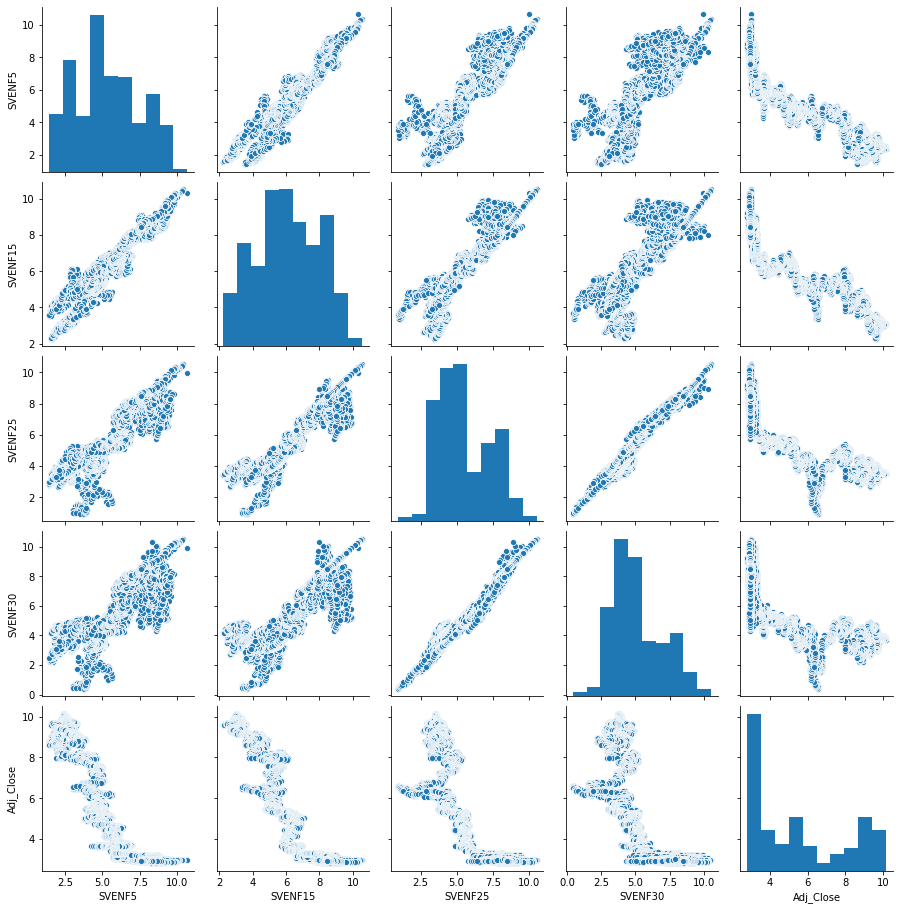

In [4]:
#Scatter plot
cols = ['SVENF5','SVENF15', 'SVENF25','SVENF30','Adj_Close']
sns.pairplot(df[cols])
plt.show()

We can see that all features that we selected seems to have some relationship with each other (either positive or negative); particularlly, SVENF25 and SVENF30 are linearly positively correlated.

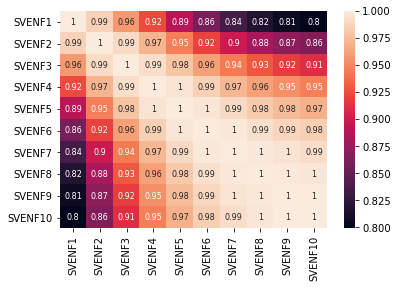

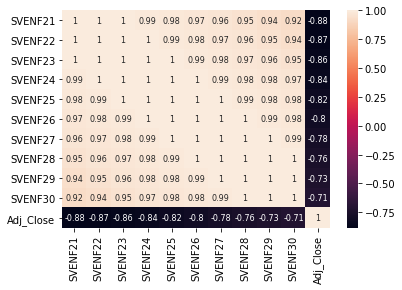

In [5]:
#heatmap
cols_1 = ['SVENF1','SVENF2', 'SVENF3','SVENF4','SVENF5',
         'SVENF6','SVENF7', 'SVENF8','SVENF9','SVENF10']
cm1 = np.corrcoef(df[cols_1].values.T)
hm1 = sns.heatmap(cm1, annot = True, yticklabels=  df[cols_1].columns, 
                 xticklabels=df[cols_1].columns, annot_kws={"size":8})
plt.show()


cols_2 = ['SVENF21','SVENF22', 'SVENF23','SVENF24','SVENF25',
         'SVENF26','SVENF27', 'SVENF28','SVENF29','SVENF30','Adj_Close']
cm2 = np.corrcoef(df[cols_2].values.T)
hm2 = sns.heatmap(cm2, annot = True, yticklabels=  df[cols_2].columns, 
                 xticklabels=df[cols_2].columns, annot_kws={"size":8})
plt.show()

We can see that many of the features are strongly positive or negative correlated (co_ef above +-0.7).

In [6]:
#train test split & standardlize 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Part 2: Perform a PCA on the Treasury Yield dataset

In [10]:
# PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print("The cumulative explained variance of all features:")
print(pca.explained_variance_ratio_)

pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train_std)
X_test_pca_3 = pca_3.transform(X_test_std)
print("The cumulative explained variance of 3 pca features:")
print(pca.explained_variance_ratio_)

The cumulative explained variance of all features:
[ 0.931  0.042  0.022  0.005  0.001  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]
The cumulative explained variance of 3 pca features:
[ 0.931  0.042  0.022  0.005  0.001  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]


Comparing the results, we can tell that 99.994% of the variance can be explained using only 3 features. 

# Part 3: Linear regression v. SVM regressor - baseline

In [11]:
# linear model to all feature
start = time.perf_counter()
lr_all = LinearRegression()
lr_all.fit(X_train_std, y_train)
y_train_predlr_all = lr_all.predict(X_train_std)
y_test_predlr_all = lr_all.predict(X_test_std)
end = time.perf_counter()
print ("Using time:",end-start,"s")
print("")
print(lr_all.coef_)
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_predlr_all)),
        mean_squared_error(y_test, y_test_predlr_all)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_predlr_all),
        r2_score(y_test, y_test_predlr_all)))

Using time: 0.009896200000000022 s

[[-12.860  133.281 -587.294  1318.190 -1477.385  477.910  595.032
  -613.846 -88.862  636.417 -566.626  389.475 -1.720 -165.892 -182.626
  -14.049 -561.064  398.139  249.743  242.038  1013.286 -694.117  314.249
  -744.654 -1413.501  424.431  182.875  1499.092 -144.153 -607.431]]
RMSE train: 0.777, test: 0.612
R^2 train: 0.902, test: 0.904


In [12]:
#linear model with PCA
start = time.perf_counter()
lr_3 = LinearRegression()
lr_3.fit(X_train_pca_3, y_train)
y_train_predlr_3 = lr_3.predict(X_train_pca_3)
y_test_predlr_3 = lr_3.predict(X_test_pca_3)
end = time.perf_counter()
print ("Using time:",end-start,"s")
print("")
print(lr_3.coef_)
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_predlr_3)),
        mean_squared_error(y_test, y_test_predlr_3)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_predlr_3),
        r2_score(y_test, y_test_predlr_3)))

Using time: 0.008558699999994701 s

[[-0.423 -0.494  0.264]]
RMSE train: 0.904, test: 0.852
R^2 train: 0.868, test: 0.867


In [13]:
#SVM regressor to all feature
start = time.perf_counter()
svm_all = SVR(kernel='linear')
svm_all.fit(X_train_std, y_train.values.ravel()) #changed shape
y_train_pred_svm_all = svm_all.predict(X_train_std)


y_test_pred_svm_all = svm_all.predict(X_test_std)
end = time.perf_counter()
print ("Using time:",end-start,"s")
print("")
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred_svm_all)),
        mean_squared_error(y_test, y_test_pred_svm_all)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_svm_all),
        r2_score(y_test, y_test_pred_svm_all)))

Using time: 6.778604000000001 s

RMSE train: 0.816, test: 0.686
R^2 train: 0.892, test: 0.893


In [14]:
# SVM regressor to 3 principal
start = time.perf_counter()
svm_3 = SVR(kernel='linear')
svm_3.fit(X_train_pca_3, y_train.values.ravel())
y_train_pred_svm_3 = svm_3.predict(X_train_pca_3)

y_test_pred_svm_3 = svm_3.predict(X_test_pca_3)
end = time.perf_counter()
print ("Using time:",end-start,"s")
print("")
print('RMSE train: %.3f, test: %.3f' % (
        np.sqrt(mean_squared_error(y_train, y_train_pred_svm_3)),
        mean_squared_error(y_test, y_test_pred_svm_3)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_svm_3),
        r2_score(y_test, y_test_pred_svm_3)))


Using time: 5.396586900000003 s

RMSE train: 0.920, test: 0.884
R^2 train: 0.863, test: 0.861


# Part 4: Conclusions

Shown in the attached table, we can tell that using PCA to reduce the dimention of the training only slightly decreased the accuracy (R^2 score). However, PCA helps to reduce the training time. Also, using linear model is a lot faster than using SVM regression.

# Part 5: Appendix

Link to github repo : https://github.com/TakumiDawn/Machine-Learning-in-Finance-Lab/tree/master/IE517_F20_HW5

In [15]:
print("My name is Takumi Li")
print("My NetID is: feiyang3")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Takumi Li
My NetID is: feiyang3
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
